<a href="https://colab.research.google.com/github/shamabansal17/Case-studies/blob/main/YULU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

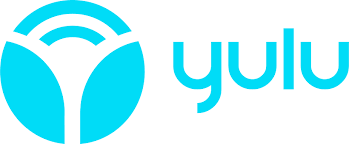

# <font color='skyblue'> **YULU- case study**</font>
> ## <font color='skyblue'>   *analyzed by-Shama Bansal*</font>

# <font color='blue'>*About Yulu*</font>
Yulu is a  Indian technology-driven electric micromobility platform that enables Integrated Urban Mobility across public and private modes of transport,
headquartered in Bengaluru. It provides shared low-speed two-wheeler electric vehicle services in Bengaluru, Mumbai, Navi Mumbai, Delhi and Gurugram. Yulu operates 25,000 dockless shared EVs and has four million users. Using Micro Mobility Vehicles (MMVs) through a user-friendly mobile app, Yulu enables first and last-mile connectivity that is seamless, shared and sustainable.

# <font color='blue'>*Problem Statement*</font>
However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting
company to delve into the factors influencing the demand for their shared electric cycles,
specifically in the Indian market.

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well do those variables describe the electric cycle demands?

## <font color='blue'>*Benefits of case study*</font>

From Yulu's Perspective:<br>
● Strategic Expansion:<br>
>> Yulu's decision to enter the Indian market is a strategic move to expand its global footprint. Understanding the demand factors in this new market is essential to tailor their services and strategies accordingly.

● Revenue Recovery:<b>
>> Yulu's recent revenue decline is a pressing concern. By analyzing the
factors affecting demand for shared electric cycles in the Indian market, they can make informed adjustments to regain profitability.lity.lity.

### <font color='blue'>*Importing Libraries*</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind, shapiro, levene,\
f_oneway, kruskal, chi2_contingency, describe

import warnings
warnings.filterwarnings('ignore')

### <font color='blue'> *Downloading Dataset*</font>

In [ ]:
! gdown 1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i

Downloading...
From: https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
To: C:\Users\lenovo\Documents\bike_sharing.csv

  0%|          | 0.00/648k [00:00<?, ?B/s]
 81%|########  | 524k/648k [00:00<00:00, 2.94MB/s]
100%|##########| 648k/648k [00:00<00:00, 3.11MB/s]


### <font color='blue'>*Reading Dataset*</font>

In [ ]:
yulu_df=pd.read_csv('bike_sharing.csv')
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### <font color='blue'>*Checking Data Structure and its attributes*</font>

In [ ]:
yulu_df.shape

(10886, 12)

In [ ]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- The data set has **10886 rows and 12 columns**.
-
The column datetime has object(1) datatype; columns- season,holiday,workingday,weather,humidity,casual registered,count have integer(8) data type; columns- temp,atempwindspped has float(3) datatype.

### <font color='blue'>*Checking Missing Values*</font>

In [ ]:
yulu_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There is **no missing/null value** in the dataset.
### <font color='blue'>*Checking Duplicate Values*</font>

In [ ]:
yulu_df[yulu_df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


There is **no duplicate** values in the data set.
### <font color='blue'>*Statistical Summary*</font>

In [ ]:
yulu_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- It is not making sense to have percentiles of holiday,working day,weather, season etc.
- Though mean of holiday is showing the holidays are there for 2% and working days are there for 68%.
- The higher mean than median of casual,registered and count column is indicating presence of outliers here with skewness of data towards right.
- The temp at the place is ranging from as below as 0 to as high as 41° C with average temperature of 20° C.
- Humidity is also varying from 0 to 100 with average of 61 %.
- Wind speed is maximum upto 60 with average wind speed of 12.79 km/hr(unit-assumed).
- There are datapoints where casual users dint booked a single ride and also when booked 367 rides in single hour with average rides booking 36.
- There are datapoints where registered users dint booked a single ride and also when booked 886 rides in single hour with average rides booking 155.
- There are datapoints where total users booked a single ride and also when booked 977 rides in single hour with average rides booking 191.
- We can see the rides booked by registered users are more in number than casual users.
### <font color='blue'>*Checking Unique Values*</font>

In [ ]:
yulu_df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

Some columns like season,holiday,working day, weather are not as per their logical category datatype.So lets convert them
the column datetime is also not in datetime datatype so converting that too.


### <font color='blue'>*Changing Column Datatypes*</font>


In [ ]:
yulu_df[['season','holiday','workingday','weather']]=yulu_df[['season','holiday','workingday','weather']].astype('category')
yulu_df['datetime']=pd.to_datetime(yulu_df['datetime'])
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
# Changing column name for count column to avoid confusion
yulu_df.rename(columns={'count':'Total_users'},inplace=True)

## <font color='blue'>*EXPLORATORY DATA ANALYSIS*</font>
## <font color='blue'>*Univariate Analysis*</font>
### <font color='blue'>*datetime*</font>

In [ ]:
yulu_df.describe(include='datetime64')

,datetime
count,10886
mean,2011-12-27 05:56:22.399411968
min,2011-01-01 00:00:00
25%,2011-07-02 07:15:00
50%,2012-01-01 20:30:00
75%,2012-07-01 12:45:00
max,2012-12-19 23:00:00


In [ ]:
yulu_df['datetime'].dt.date.value_counts().sort_values()

datetime
2011-01-18    12
2011-03-10    22
2011-01-12    22
2011-02-11    22
2011-01-03    22
              ..
2012-12-15    24
2012-12-16    24
2012-12-17    24
2012-07-17    24
2011-06-08    24
Name: count, Length: 456, dtype: int64

In [ ]:
# time analysis
yulu_df['datetime'].dt.time.value_counts().sort_values()

datetime
03:00:00    433
04:00:00    442
02:00:00    448
05:00:00    452
01:00:00    454
00:00:00    455
06:00:00    455
07:00:00    455
08:00:00    455
09:00:00    455
10:00:00    455
11:00:00    455
12:00:00    456
15:00:00    456
16:00:00    456
17:00:00    456
18:00:00    456
19:00:00    456
20:00:00    456
21:00:00    456
22:00:00    456
13:00:00    456
14:00:00    456
23:00:00    456
Name: count, dtype: int64

In [ ]:
# Checking days when not a single bike got rented
date_range=pd.date_range(yulu_df['datetime'].min(),yulu_df['datetime'].max(),freq='D')
rented_days=np.array(yulu_df['datetime'].dt.date.values, dtype='datetime64')
not_rented=[date for date in date_range if date not in rented_days]
len(not_rented)

263

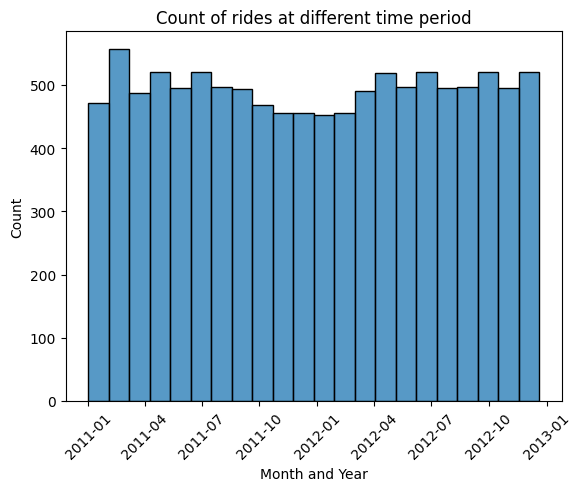

In [ ]:
# Visual Analysis
plt.title("Count of rides at different time period")
sns.histplot(yulu_df['datetime'])
plt.xlabel("Month and Year")
plt.xticks(rotation=45)
plt.show()



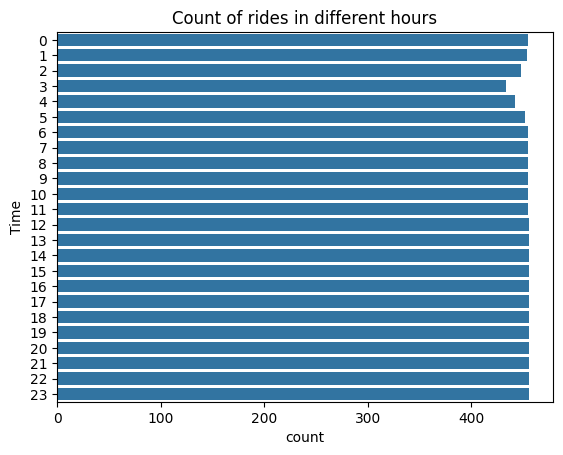

In [ ]:
plt.title("Count of rides in different hours")
sns.countplot(y=yulu_df['datetime'].dt.hour)
plt.ylabel('Time')
plt.show()

- The data is available from 01-01-2011 to 19-12-2012 which is 718 days.
- Yulu made bookings for 456 days out of given period, there are 263 days when no booking is made, which is an area of concern.
- There is only one instance when we have 12 no-booking hours on 18-01-2011, except that max to max we have only 2 no user hours.
- Sometimes we have no bookings from 02-04 AM but at other times, we have daily bookings.
- There was a dip in sales between the period 10-2022 to 03-2012 which improved gradually with time, need to find reason for that.
- The bookings are less during early morning hours which is logical too due to less movements that time.

  ### <font color='blue'> *season ,  holiday , workingday , weather*</font>

In [ ]:
column=yulu_df.columns[1:5]

for col in column:
  print(yulu_df[col].value_counts())
  print("\n\n","*"*100)

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64


 ****************************************************************************************************
holiday
0    10575
1      311
Name: count, dtype: int64


 ****************************************************************************************************
workingday
1    7412
0    3474
Name: count, dtype: int64


 ****************************************************************************************************
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


 ****************************************************************************************************


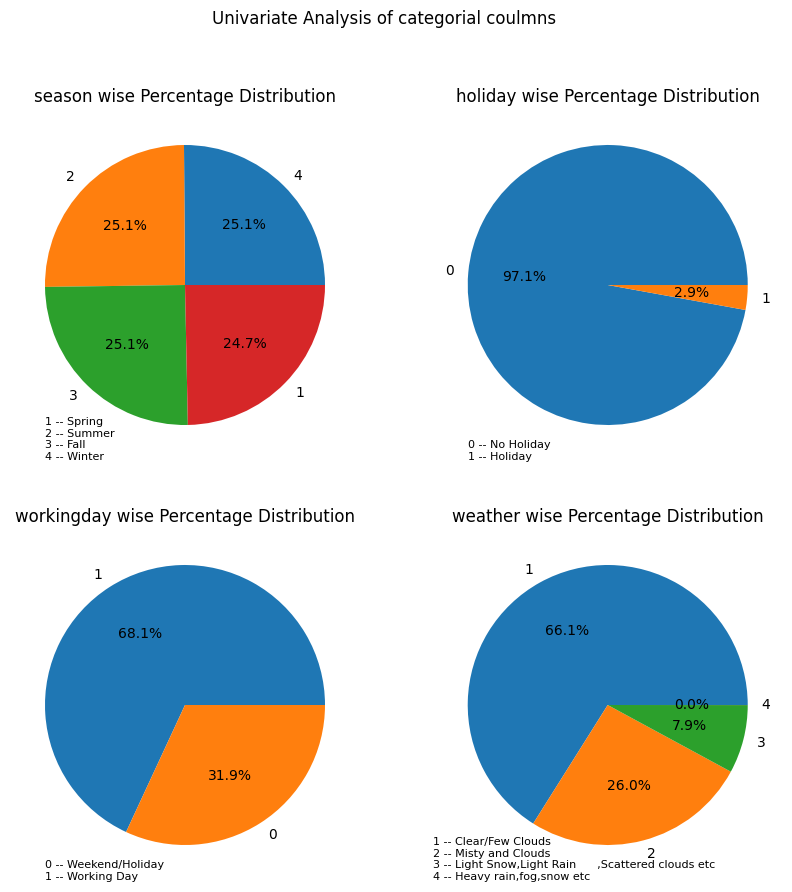

In [ ]:
# Visual Analysis
plt.figure(figsize=(10,10))
plt.suptitle("Univariate Analysis of categorial coulmns")
i=1
for col in column:
   plt.subplot(2,2,i)

   plt.pie(yulu_df[col].value_counts(),labels=yulu_df[col].value_counts().index,autopct='%1.1f%%')
   plt.title(f'{col} wise Percentage Distribution')
   if i==1:
      plt.annotate('1 -- Spring \n2 -- Summer \n3 -- Fall \n4 -- Winter',xy=(-1,-1.25),fontsize=8)
   elif i==2:
      plt.annotate('0 -- No Holiday \n1 -- Holiday',xy=(-1,-1.25),fontsize=8)
   elif i==3:
      plt.annotate('0 -- Weekend/Holiday \n1 -- Working Day',xy=(-1,-1.25),fontsize=8)
   else:
      plt.annotate('1 -- Clear/Few Clouds\n2 -- Misty and Clouds \n3 -- Light Snow,Light Rain\
      ,Scattered clouds etc \n4 -- Heavy rain,fog,snow etc',xy=(-1.25,-1.25),fontsize=8)
   i+=1
plt.show()

In [ ]:
# checking is there any value of holiday opposed to working day
yulu_df[(yulu_df['holiday']==1) & (yulu_df['workingday']==1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Total_users


As we can see holidays are just 2.9% which must not include weekends and Not working days are 31.9% means it includes holidays as weekends are generally upto 29% of the year, so we dont have any requirement of just looking at holidays perspective in our case study as not working day includes both (weekends and holidays). Confirmed from abpve code too, working day is excepting holidays already, so can drop that column.

- In all seasons the no of times the bookings are made is almost similar.
- There are less no of bookings when there is holiday, only 2.9% as compared to no holiday time period.
- On working days bookings are made 68 % means more than non working days which is 31.9% only.
- We can see the bookings are high when waether is clear which graduallly falls when clouds and mist there, further when light snow and rain is there and almost negligible when there is heavy rain, fog and snow.
- Though the above difference can be due to less number of holidays, less non working days, weather extremity may not be there on other days etc and not the total decrease, we may need to explore it further with external data which is out of scope here.

### <font color='blue'>*temp ,atemp ,humidity ,windspeed*</font>

In [ ]:
column=yulu_df.columns[5:9]
for col in column:
  print(f"{col} unique values\n")
  print(yulu_df[col].unique())
  print("\n\n","*"*100)

temp unique values

[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]


 ****************************************************************************************************
atemp unique values

[14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]


 ****************************************************************************************************
humidity unique values

[ 

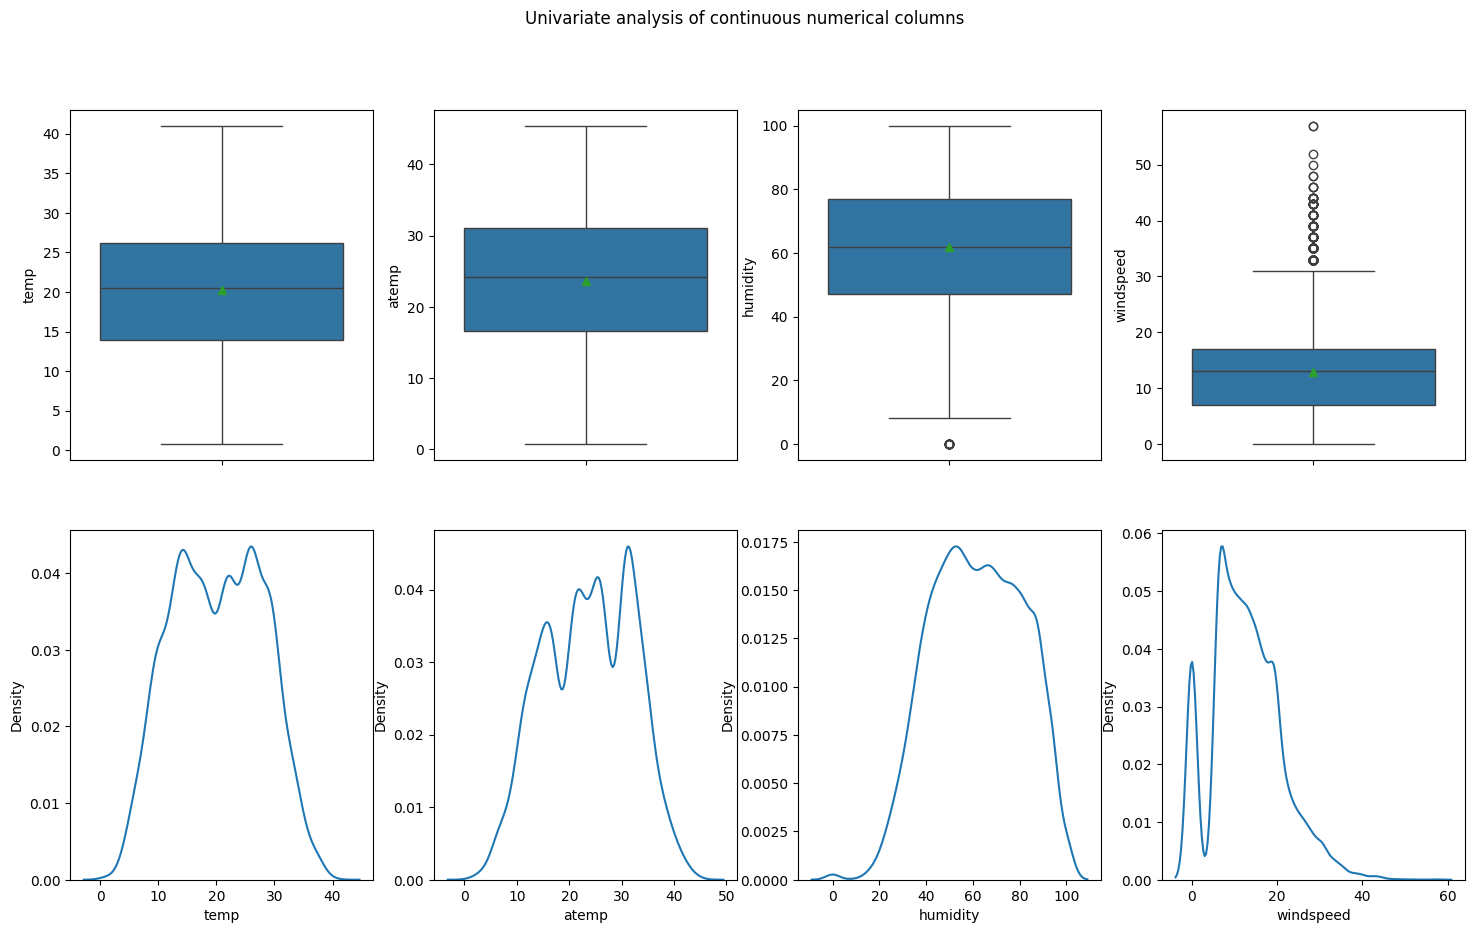

In [ ]:
# Visual Analysis
plt.figure(figsize=(18,10))
i=1
plt.suptitle('Univariate analysis of continuous numerical columns')
for col in column:
  plt.subplot(2,4,i)
  sns.boxplot(yulu_df[col],showmeans=True)
  i+=1
for col in column:
  plt.subplot(2,4,i)
  sns.kdeplot(yulu_df[col])
  i+=1
plt.show()

In [ ]:
# Removing Outliers
yulu_df['humidity']=np.clip(yulu_df['humidity'],np.percentile(yulu_df['humidity'],1),yulu_df['humidity'].max())
yulu_df['windspeed']=np.clip(yulu_df['windspeed'],yulu_df['windspeed'].min(),np.percentile(yulu_df['windspeed'],97))


- As these are continuous numerical columns we cant infer anything from there count or unique values.
- The bikes are rented the most when the tempertaure and temperature feel is between 10° to 30° C.
- Temp and atemp are almost similar with a little high temp feel in atemp so they are highly correlated so can drop one of them to remove redundancy.
- The bikes are rented the most when the humidity is 20+ and less than 90, though there is an outlier too when humidity was near to 0 which is clipped.
- Windspeed is below 35 when bikes are rented more and very few above 35+ windspeed as outliers only which are clipped at 97 percentile value.

### <font color='blue'> *casual, registered, total users* </font>

In [ ]:
column=yulu_df.columns[9:]

for col in column:
  print(f"rides by no of {col} users \n")
  print(yulu_df[col].value_counts())
  print("\n\n","*"*100)

rides by no of casual users 

casual
0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: count, Length: 309, dtype: int64


 ****************************************************************************************************
rides by no of registered users 

registered
3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: count, Length: 731, dtype: int64


 ****************************************************************************************************
rides by no of Total_users users 

Total_users
5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64


 ****************************************************************************************************


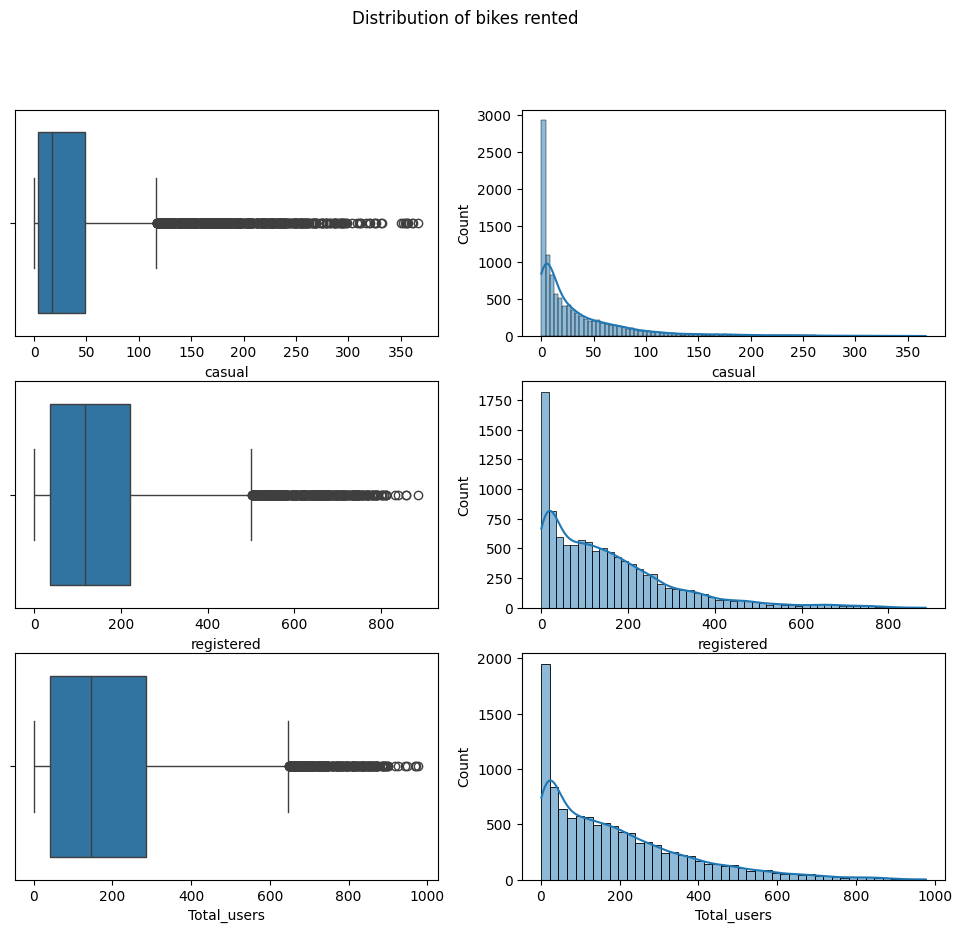

In [ ]:
# Visual Analysis
plt.figure(figsize=(12,10))
i=1
plt.suptitle('Distribution of bikes rented')
for col in column:
  plt.subplot(3,2,i)
  sns.boxplot(yulu_df[col],orient='h')
  i+=1
  plt.subplot(3,2,i)
  sns.histplot(yulu_df[col],kde=True)
  i+=1
plt.show()


- We can see the number of rides in a single hour is varying from 1 to 367, though the less rides in 1 hour are more frequent in number. 50% below 17 each hour, 75% below 49 rides in a hour, higer counts in a hour are very few instances for casual users.
- We can see the number of rides in a single hour is varying from 0 to 886, though the less rides in hour are more frequent as 25% rides are below 36 each hour, 50% below 118 and 75% below 222 in number and 400+ rides in a hour are very few instances for registered users.
- Total users is the sum of casual and registered so it has same interpretations.
- The distribution for both casual and registered are right skewed which implies that the data is more for lower counts and less for higher counts.
- There are many **outliers** in both casual and registered users bike rental counts but as they are on higher side, it shows an area of profitability and getting ready for such positive responses from user, so not removing them.

## <font color='blue'>*Bivariate and Multivariate Analysis*</font>

### <font color='blue'>*Relation between working day and bikes rented according to users category*</font>

In [ ]:
# checking various categories and their relation to bike rented

yulu_df.groupby(["workingday"])[["casual","registered","Total_users"]].sum()/sum(yulu_df['Total_users'])*100

,casual,registered,Total_users
workingday,,,
0,9.879615,21.521945,31.40156
1,8.923526,59.674914,68.59844


- There is not much difference in bikes rented on working or non working day for casual users.
- But the difference is huge in case of registered users who booked thrice times bikes in working days than non working days.

### <font color='blue'>*Relation between weather and bikes rented according to users category*</font>

In [ ]:
yulu_df.groupby(["weather"])[["casual","registered","Total_users"]].sum()/sum(yulu_df['Total_users'])*100


,casual,registered,Total_users
weather,,,
1,13.900903,56.877327,70.778230
2,4.183505,20.135163,24.318669
3,0.718445,4.176792,4.895237
4,0.000288,0.007576,0.007864


- There is visible difference in bikes rented on clear weather(1),misty clouds(2), light rain(3) and heavy rain(4).
- With the bad weather the renting too decreases.
- 94% bikes rented in clear, cloudy or misty conditions.

### <font color='blue'>*Relation between weather,working day and bikes rented according to users category*</font>


In [ ]:
yulu_df.groupby(["weather",'workingday'])[["casual","registered","Total_users"]].sum()/sum(yulu_df['Total_users'])*100

casual  registered  Total_users
weather workingday                                   
1       0           7.394763   15.548345    22.943107
        1           6.506141   41.328982    47.835123
2       0           2.120811    5.041918     7.162729
        1           2.062695   15.093245    17.155939
3       0           0.364042    0.931682     1.295723
        1           0.354404    3.245110     3.599514
4       0           0.000000    0.000000     0.000000
        1           0.000288    0.007576     0.007864

- There is not much difference in casual users bike renting behaviour as per working day but it is affected by weather.
- For registered users, the bike renting is much more during working days than non working days,almost three times.

### <font color='blue'>*Relation between season and bikes rented according to users category*</font>

In [ ]:
yulu_df.groupby(['season'])[["casual","registered","Total_users"]].sum()/sum(yulu_df['Total_users'])*100


,casual,registered,Total_users
season,,,
1,1.994988,12.989505,14.984493
2,6.217861,21.990663,28.208524
3,6.843426,23.876755,30.720181
4,3.746866,22.339936,26.086802


- Mostly bikes were rented in season 3 and 2 that is fall/Autumn and Summer season for casual users.
- Mostly bikes were rented in season 3, 4 and 2 that is fall/Autumn,Winter and Summer season for registered users.
- Least bikes were rented in season Spring(1) be it for casual or registered users.
- In winter season registered users renting was not declined but for casual users it declined compared to autumn and summer.

### <font color='blue'>*Bivariate Visual Analysis*</font>

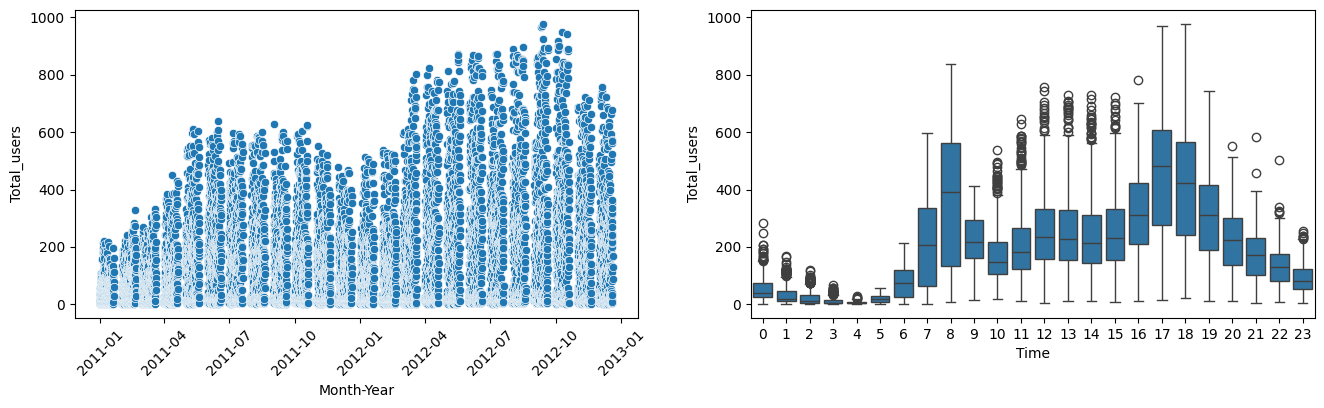

In [ ]:
# Relation between Time , Date/Month and Total Users
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.scatterplot(x=yulu_df['datetime'],y=yulu_df['Total_users'])
plt.xlabel('Month-Year')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(x=yulu_df['datetime'].dt.hour,y=yulu_df['Total_users'])
plt.xlabel('Time')
plt.show()

- Yulu business was started increasing gradually from January, 2011 to July and remained stabled till October,2011.
- It started dipping slowly till feb,2012 and started gaining gradually from then.
- It was at its peak during september,2012 but again started dipping from Nov-Dec,2012.
- We need to find the root cause of this Nov-Dec dip, that why is the demand started dipping again.
- Demand is high during 7:00, 8:00, 17:00, 18:00 hours.
- it is very low during early morning 01:00 to 05:00 hours with average demand between other hours.

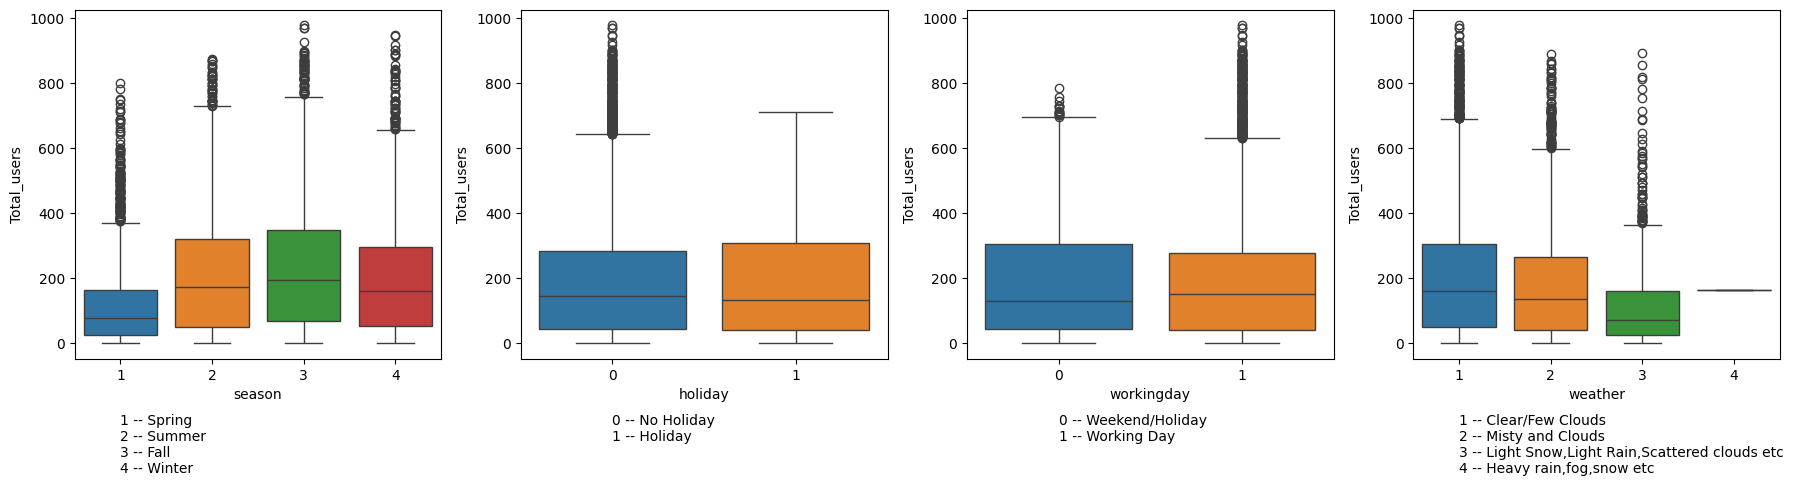

In [ ]:
# finding relation betweeen categorial variables and Users

column=yulu_df.columns[1:5]
plt.figure(figsize=(18,5))
i=1
for col in column:
  plt.subplot(1,4,i)
  sns.boxplot(data=yulu_df, x=col,y='Total_users',hue=col,legend=False)
  plt.tight_layout()
  if i==1:
      plt.text(0,-400,'1 -- Spring \n2 -- Summer \n3 -- Fall \n4 -- Winter')
  elif i==2:
      plt.text(0,-300,'0 -- No Holiday \n1 -- Holiday')
  elif i==3:
      plt.text(0,-300,'0 -- Weekend/Holiday \n1 -- Working Day')
  else:
      plt.text(0,-400,'1 -- Clear/Few Clouds\n2 -- Misty and Clouds \n3 -- Light Snow,Light Rain,Scattered clouds etc \n4 -- Heavy rain,fog,snow etc')
  i+=1

plt.show()

- The demand in Fall/Autumn season is most followed by summer, winter.
-  In spring it is the least.
- There are various times high number of bikes rented in all seasons which are outlier but a positive sign for business.
- There is not much impact of Holiday or no holiday on the bike demands.
- The non working day have high demands than working days with many outliers on heavy demand in working days.
- The below 50% renting on non working day is below 130 approx while for 150.
- Weather have strong effect on bike demands as clear weather have high demands with decline during bad weather conditions, with demand in only a single hour during heavy rain with thuderstorm,ice rain and snow.

### <font color='blue'> *Finding correlation between numeric columns* </font>

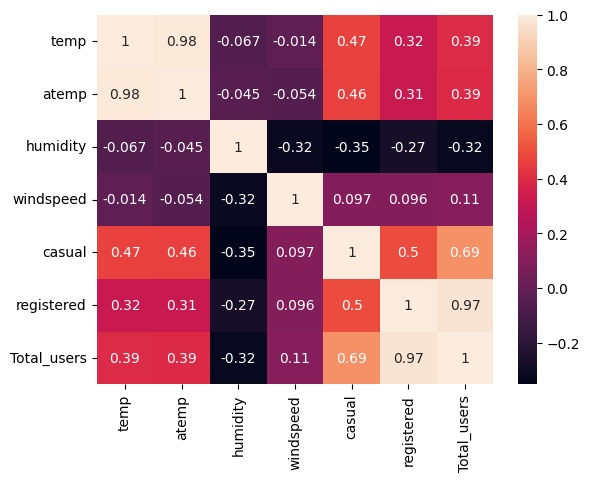

In [ ]:

sns.heatmap(yulu_df[yulu_df.columns[5:]].corr(),annot=True)
plt.show()

- There is high +ve correlation between temp and atemp so we can remove any of them.
- Registered and total users are highly +vely correlated too as total user is sum of casual and registered users so it makes sense too.
- But they both are required to have inferences out of dat, so keeping them.
- There is +ve correlation between casual and total users too as totalusers include casual too.
- The relation between total and casual users is +ve enough too which implies both users reacts a bit similar way to rides.


In [ ]:
# Dropping useless columns
yulu_df.drop(columns=['atemp','holiday'],inplace=True)

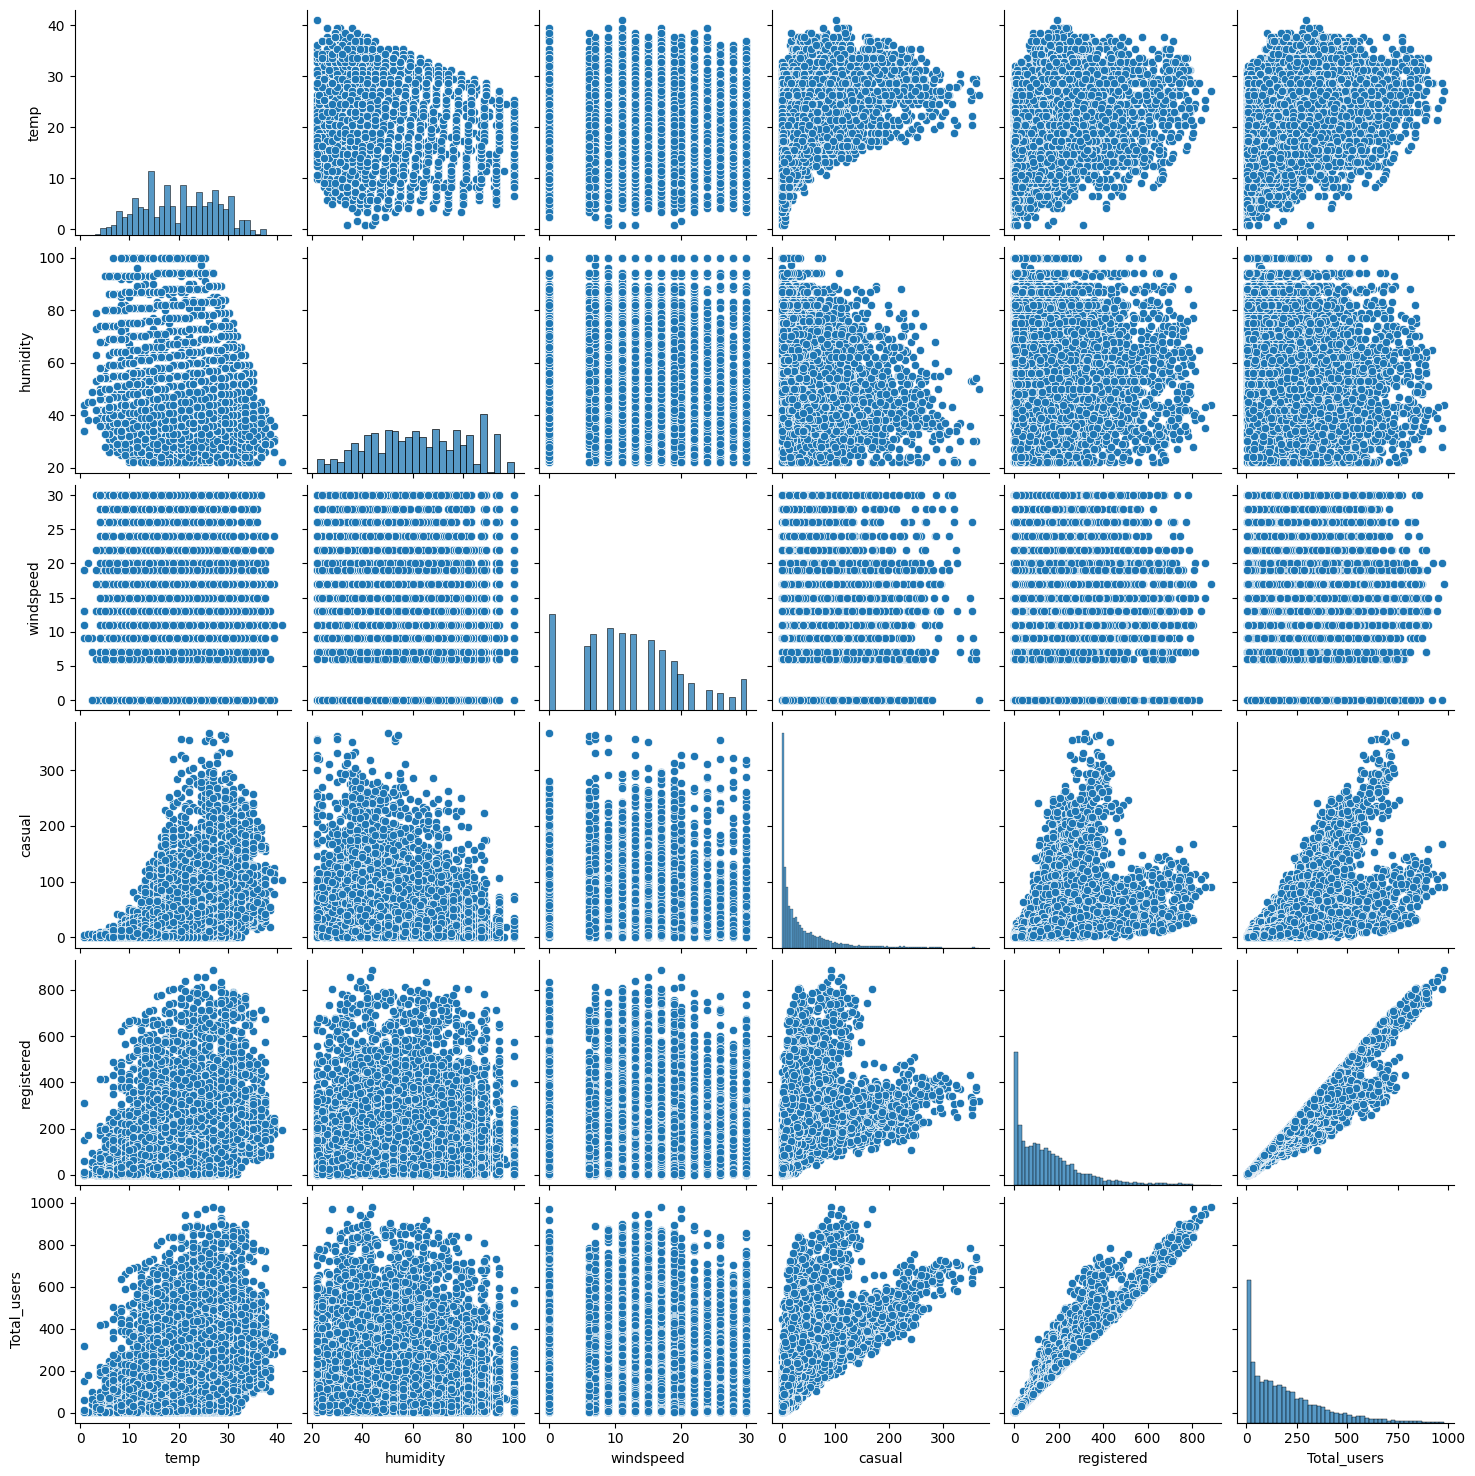

In [ ]:
# Creating pairplot to bivariate analysis
sns.pairplot(yulu_df)
plt.show()

- When temperature is less from 1° - 8°C there is almost no renting for bikes.
- When humidity increases too much casual users shies away from renting but registered rented a bit.
- Windspeed doesnt have much effect on renting.
- Casual users increase with increase in temperature and decrease in humidity.
- Registered users too increased with increase in temperature.

## <font color='blue'>*HYPOTHESIS TESTING*</font>

### <font color='blue'>*Finding out if there any statistical significant difference between the no. of bike rides on Weekdays and Weekends/Holidays?*</font>

In [ ]:
# Lets separate the dataset based on category.

weekday=yulu_df[yulu_df['workingday']==1]['Total_users']
weekend=yulu_df[yulu_df['workingday']==0]['Total_users']

# Finding mean and standard deviation of both groups

print('Mean : Weekday-',weekday.mean(),', Weekend-',weekend.mean(), '\nVariance : Weekday-',weekday.std(),', Weekend-',weekend.std())

Mean : Weekday- 193.01187263896384 , Weekend- 188.50662061024755 
Variance : Weekday- 184.5136590421481 , Weekend- 173.7240153250003


We can see their mean and variance are almost same so lets do statistical test to check if they are same or different

### <font color='blue'>*checking the normality of both groups*</font>

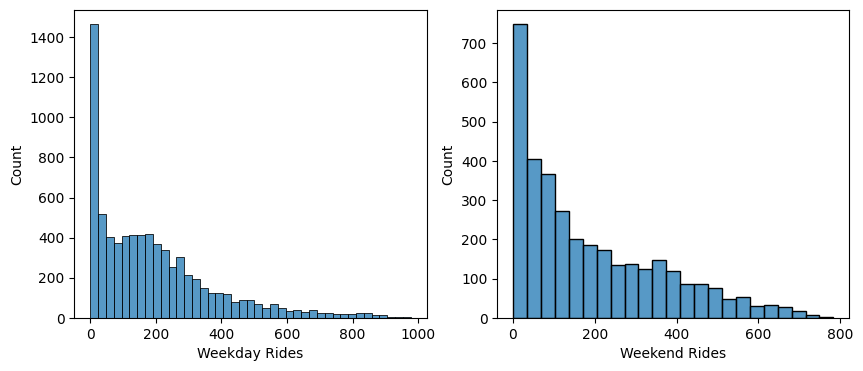

In [ ]:
# Using visual analysis
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(weekday)
plt.xlabel("Weekday Rides")
plt.subplot(1,2,2)

sns.histplot(weekend)
plt.xlabel("Weekend Rides")

plt.show()

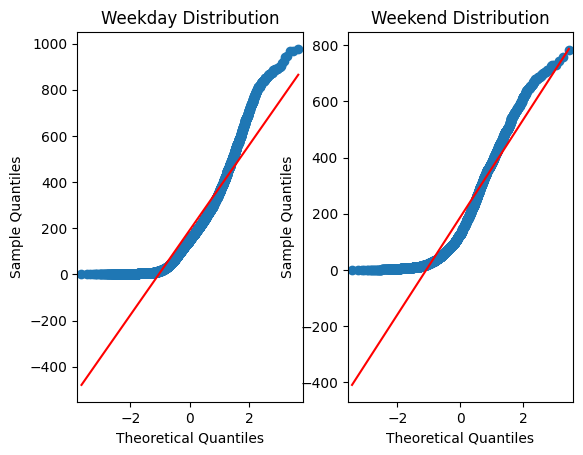

In [ ]:
# using QQplot

fig,ax=plt.subplots(1,2)
qqplot(weekday,line='s',ax=ax[0])
ax[0].set_title('Weekday Distribution')

qqplot(weekend,line='s',ax=ax[1])
ax[1].set_title('Weekend Distribution')

fig.show()

We can see data is not perfectly Gaussian but the Z-test is particularly sensitive to deviations from normality, so cannot be used here but the t-test can be used even if the data is not perfectly Gaussian, especially if the sample size is large enough. The t-test is known to be robust to moderate deviations from normality, especially if the sample size is sufficiently large (typically, a sample size of around 30 or more is considered large enough for the Central Limit Theorem to apply).So, we are using Ttest here.

Other assumptions of T Test here:
1. Gaussian- discussed above.
2. The datapoints are independent in both datasets.
3. The variances of the two groups being compared are approximately equal too.

### <font color='blue'>*Steps to Ttest independent*</font> :
1. NULL HYPOTHESIS(H$_0$) :  Working days and non working days have no significant effect on bike rentals.<br>
   ALTERNATIVE HYPOTHESIS(H$_a$) : Working days and non working days have significant effect on bike rentals.<br>
2. T distribution and approx Gaussian distribution data.<br>
3. Two tailed test is to be performed.<br>
4. Finding pvalue.<br>
5. Let's assume significance level to be 0.05 and compare with pvalue.

In [ ]:
# 2 tail ttest independent
tstats, pvalue=ttest_ind(weekday,weekend,alternative='two-sided')
alpha=0.05
if pvalue< alpha:
  conclusion ='Reject Null Hypothesis.'
else :
  conclusion = 'Fail to reject Null Hypothesis.'
if conclusion == 'Reject Null Hypothesis':
  print(f'P value:{pvalue}\n{conclusion}\nThere is statistically significant difference in working and non working days rides.')
else:
  print(f'P value:{pvalue}\n{conclusion}\nThere is no statistically significant difference in working and non working days rides.')

P value:0.22644804226361348
Fail to reject Null Hypothesis.
There is no statistically significant difference in working and non working days rides.


**As we can see there is no significant difference between the effect of weekday and weekend on bike rental.**

Lets try out if on weekday, rides are more than weekend.<br>
1. NULL HYPOTHESIS(H$_0$) :  Working days have equal rides as on weekend.<br>
   ALTERNATIVE HYPOTHESIS(H$_a$) : Working days have more ride than non working days.<br>
2. T distribution and approx Gaussian distribution data.<br>
3. Right tailed test is needed.<br>
4. Finding pvalue.<br>
5. Let's assume significance level to be 0.05 and compare with pvalue.

In [ ]:
tstats, pvalue=ttest_ind(weekday,weekend,alternative='greater')
if pvalue< alpha:
  conclusion ='Reject Null Hypothesis.'
else :
  conclusion = 'Fail to reject Null Hypothesis.'
if conclusion == 'Reject Null Hypothesis':
  print(f'P value:{pvalue}\n{conclusion}\nWeekday rides are more than Weekend rides.')
else:
  print(f'P value:{pvalue}\n{conclusion}\nWeekday rides are not more than weekend rides.')

P value:0.11322402113180674
Fail to reject Null Hypothesis.
Weekday rides are not more than weekend rides.


### <font color='blue'>*Conclusion*</font>

- There is no significant difference between effect on bikes rented based on working or non working days.
- The rides on working days as assumed are not greater than non working days



### <font color='blue'>*Finding out if there any statistical significant difference between the no. of bike rides based on weather conditions?*</font>

In [ ]:
# Lets separate the sample dataset based on weather category.

prt_cld_clear=yulu_df[yulu_df['weather']==1]['Total_users']
mist_cloudy=yulu_df[yulu_df['weather']==2]['Total_users']
rain_snw_thndr=yulu_df[yulu_df['weather']==3]['Total_users']
rain_ice_thndr=yulu_df[yulu_df['weather']==4]['Total_users']

In [ ]:
# getting Statistical Values
print('Clear Weather Statistics\n',describe(prt_cld_clear),'\n')
print('Mist and cloudy Weather Statistics\n',describe(mist_cloudy),'\n')
print('Light rain with snow Weather Statistics\n',describe(rain_snw_thndr),'\n')
print('Heavy rain with ice,snowy Weather Statistics\n',describe(rain_ice_thndr),'\n')

Clear Weather Statistics
 DescribeResult(nobs=7192, minmax=(1, 977), mean=205.23679087875416, variance=35328.79846268022, skewness=1.1396195185041555, kurtosis=0.9632151489948488) 

Mist and cloudy Weather Statistics
 DescribeResult(nobs=2834, minmax=(1, 890), mean=178.95553987297106, variance=28347.248993301797, skewness=1.293759189703101, kurtosis=1.5835130178554868) 

Light rain with snow Weather Statistics
 DescribeResult(nobs=859, minmax=(1, 891), mean=118.84633294528521, variance=19204.775892714195, skewness=2.1833160390123187, kurtosis=5.961191782478394) 

Heavy rain with ice,snowy Weather Statistics
 DescribeResult(nobs=1, minmax=(164, 164), mean=164.0, variance=nan, skewness=nan, kurtosis=nan) 



- We can see their mean, variance are different, all right skewed and light rain is leptokurtic   while other two are platykurtic.
- We know from univariate analysis that heavy rain has one data point only and that is why no value for variance, skewness and kurtosis, so not taking into consideration the heavy rain dat apoint for testing.
- Lets go ahead with test to check if they are statistically same or different.As their are more than 2 samples, we can do **ANOVA** test.
- Checking its 1st assumption:
> Data to follow **Normal Distribution**

### <font color='blue'>*checking the normality of all groups*</font>

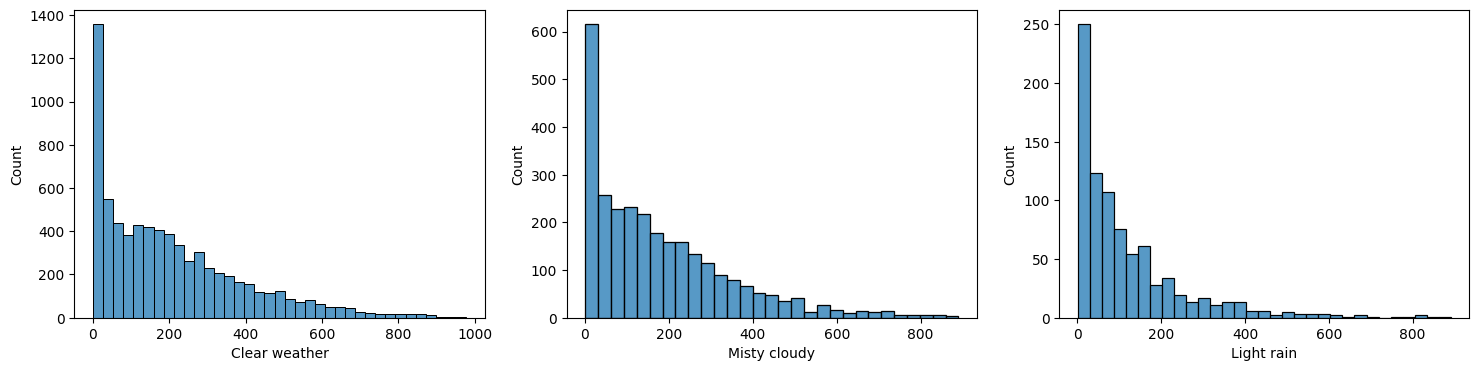

In [ ]:
# Using visual method
column=[prt_cld_clear,mist_cloudy,rain_snw_thndr]
plt.figure(figsize=(18,4))
i=1
for col in column:
  plt.subplot(1,3,i)
  sns.histplot(col)
  if i==1:
    plt.xlabel("Clear weather")
  elif i==2:
    plt.xlabel('Misty cloudy')
  else:
    plt.xlabel('Light rain')
  i+=1
plt.show()

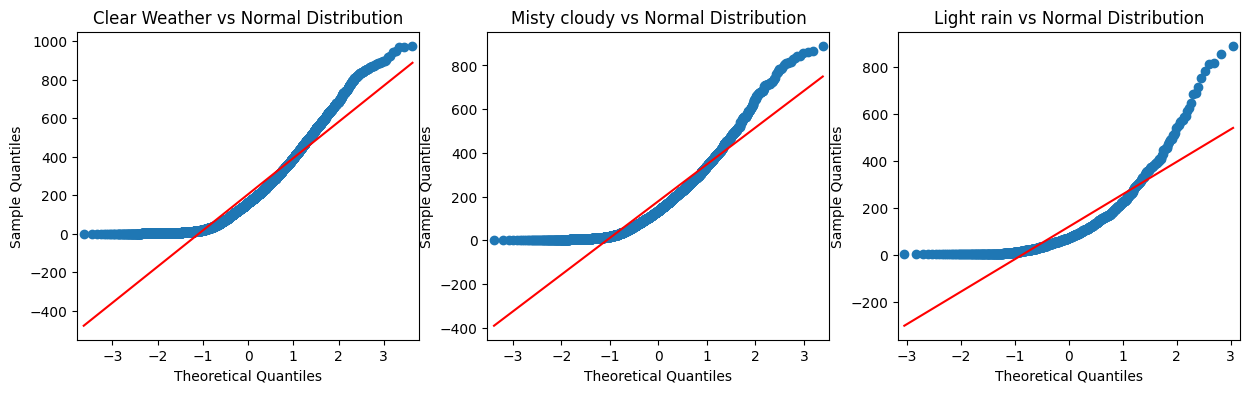

In [ ]:
# Using QQplot

fig,ax=plt.subplots(1,3,figsize=(15,4))
qqplot(prt_cld_clear,line='s',ax=ax[0])
qqplot(mist_cloudy,line='s',ax=ax[1])
qqplot(rain_snw_thndr,line='s',ax=ax[2])
ax[0].set_title('Clear Weather vs Normal Distribution')
ax[1].set_title('Misty cloudy vs Normal Distribution')
ax[2].set_title('Light rain vs Normal Distribution')


fig.show()

As we can see through both tests that data is not normal lets confirm through **Shapiro wilk** test too.


In [ ]:
# Null Hypo: Data is gaussian
# Alternative Hypo: Data is not gaussian

sh_stats,pvalue1=shapiro(prt_cld_clear)
sh_stats,pvalue2=shapiro(mist_cloudy)
sh_stats,pvalue3=shapiro(rain_snw_thndr)
print(f' Clear weather, pvalue: {pvalue1}\n Misty cloudy, pvalue: {pvalue2}\n Light rain, pvalue: {pvalue3}')

 Clear weather, pvalue: 1.5964921477006552e-57
 Misty cloudy, pvalue: 9.777839106111785e-43
 Light rain, pvalue: 3.875893017396149e-33


As we can see pvalue for all three are less than alpha(assumed to be 0.05), we reject the null hypothesis and concludes that data is not gaussian for all 3 samples.So neither of the samples data is Gaussian but we have to check for the distribution of population and not sample as Anova assumption. So if we do the bootstraping, we will be able to conclude that data is Gaussian as per CLT. Thus, lets assume our population distribution to be Gaussian.

Lets check 2nd assumptions of ANOVA here : <br>
**Homogeneity of Variances** (Homoscedasticity) <br>
through **Levene Test** :

In [ ]:
# Null Hypo: Variances are equal
# Alt Hypo: Variance is different for atleast one group
Alpha= 0.05 #(assumed)

lvnstats,pvalue=levene(prt_cld_clear,mist_cloudy,rain_snw_thndr)

if pvalue<alpha:
  print('p value=',pvalue, ', Reject Null Hypotheis, atleast 1 group have statistically different variance')
else:
  print('p value=',pvalue, ', Fail to reject Null hypothesis, all data have statisticaly same variances')

p value= 6.198278710731511e-36 , Reject Null Hypotheis, atleast 1 group have statistically different variance


The Levene variance test also resulted that variance is different for samples. so that may impact the reliabity of test, which we will confirm by performing the **Kruskal Wallis Test** too later.<br>

3rd Assumption of Anova:<br>

**Independence**:<br>
 Observations within each group are independent of each other. Additionally, the groups themselves are assumed to be independent too.

### <font color='blue'>*Steps to ANOVA one way*</font> :
1. NULL HYPOTHESIS(H$_0$) :  Demand for bike rides is same in all weather conditions.<br>
   ALTERNATIVE HYPOTHESIS(H$_a$) : Demand for rented bike rides is different in atleast one weather condition.<br>
2. F distribution for statistics and assumed Gaussian distribution data.<br>
3. Right tailed test is to be performed as anova is right tail always.<br>
4. Finding pvalue.<br>
5. Let's assume significance level to be 0.05 and compare with pvalue.<br>

In [ ]:
# ANOVA TEST

fstats,pvalue=f_oneway(prt_cld_clear,mist_cloudy,rain_snw_thndr)

alpha=0.05
if pvalue< alpha:
  conclusion ='Reject Null Hypothesis.'
else :
  conclusion = 'Fail to reject Null Hypothesis.'
if conclusion == 'Reject Null Hypothesis.':
  print(f'P value:{pvalue}\n{conclusion}\nThere is effect of weather on demand for rental bikes.')
else:
  print(f'P value:{pvalue}\n{conclusion}\nThere is no effect of weather on demand for rental bikes.')

P value:4.976448509904196e-43
Reject Null Hypothesis.
There is effect of weather on demand for rental bikes.


As Anova shows weather has significant effect on bike rentals lets confirm through another test too.<br>


In [ ]:
# KRUSKAL WALLIS TEST
# Ho: No effect of weather on bike rentals
# Ha: atleast 1 weather has significant effect on bike rentals

kruskal(prt_cld_clear,mist_cloudy,rain_snw_thndr)

KruskalResult(statistic=204.95566833068537, pvalue=3.122066178659941e-45)

Kruskal too confimed that atleast 1 weather has significant effect on the bike rentals
Lets check which group has different effect than other on demand for rented bikes using Ttests.

In [ ]:
# Null hypo: both groups have same effect on demands
# alternative:during  clear weather demand is more than mist and cloudy weather

ttest_ind(prt_cld_clear,mist_cloudy,alternative='greater')

TtestResult(statistic=6.488169251217751, pvalue=4.549458108254271e-11, df=10024.0)

In [ ]:
# Null hypo: both groups have same effect on demands
# alternative:during  clear weather demand is more than Rain,snow and thunder weather

ttest_ind(prt_cld_clear,rain_snw_thndr,alternative='greater')

TtestResult(statistic=13.05352692528198, pvalue=7.459354885923139e-39, df=8049.0)

In [ ]:
# Null hypo: both groups have same effect on demands
# alternative:during mist cloud weather demand is more than rain, snow thunder

ttest_ind(mist_cloudy,rain_snw_thndr,alternative='greater')

TtestResult(statistic=9.53048112515673, pvalue=1.3729836595136823e-21, df=3691.0)

### <font color='blue'>*Conclusion*</font>

As in all 3 above tests the null hypothesis got rejected due to less value than alpha<br> which is assumed to be 0.05, we can conclude that we have more bike rentals on clear weather day followed by Misty cloudy weather day and then in Light rainwith snow and light thundering weather day.



### <font color='blue'>*Finding out if there any statistical significant difference between the no. of bike rides based on season conditions?*</font>

In [ ]:
# Lets separate the sample dataset based on category.

Spring=yulu_df[yulu_df['season']==1]['Total_users']
Summer=yulu_df[yulu_df['season']==2]['Total_users']
Autumn=yulu_df[yulu_df['season']==3]['Total_users']
Winter=yulu_df[yulu_df['season']==4]['Total_users']

In [ ]:
from scipy.stats import describe
print('Spring season statistics\n',describe(Spring),'\n')
print('Summer season statistics\n',describe(Summer),'\n')
print('Autumn season statistics\n',describe(Autumn),'\n')
print('Winter season statistics\n',describe(Winter),'\n')

Spring season statistics
 DescribeResult(nobs=2686, minmax=(1, 801), mean=116.34326135517499, variance=15693.568533717142, skewness=1.8870013494363214, kurtosis=4.30449666648592) 

Summer season statistics
 DescribeResult(nobs=2733, minmax=(1, 873), mean=215.25137211855105, variance=36867.01182553242, skewness=1.0027135037743604, kurtosis=0.4222412657621657) 

Autumn season statistics
 DescribeResult(nobs=2733, minmax=(1, 977), mean=234.417124039517, variance=38868.517012662865, skewness=0.9909503852121176, kurtosis=0.6959091337333851) 

Winter season statistics
 DescribeResult(nobs=2734, minmax=(1, 948), mean=198.98829553767374, variance=31549.720316669307, skewness=1.1714741534595685, kurtosis=1.2689637849725477) 



- We can see their mean, variance are different, all right skewed and Spring season is leptokurtic   while other are platykurtic.
- Lets go ahead with test to check if they are statistically same or different.As their are more than 2 samples, we can do **ANOVA** test.


 Checking its 1st assumption:
> Data to follow **Normal Distribution**<br>
### <font color='blue'>*checking the normality of all groups*</font>

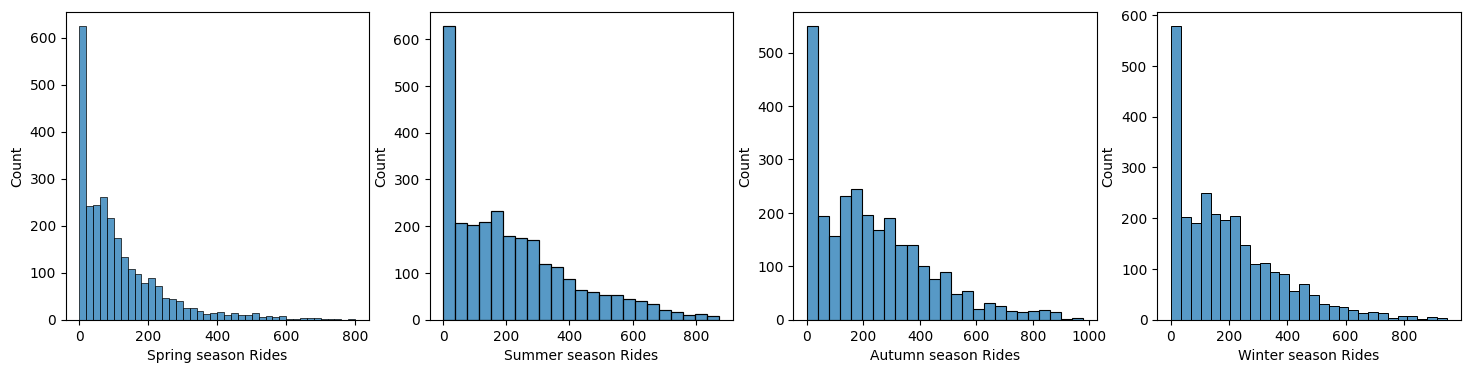

In [ ]:
# Using Visual Method
column=[Spring,Summer,Autumn,Winter]
plt.figure(figsize=(18,4))
i=1
for col in column:
  plt.subplot(1,4,i)
  sns.histplot(col)
  if i==1:
    plt.xlabel("Spring season Rides")
  elif i==2:
    plt.xlabel('Summer season Rides')
  elif i==3:
    plt.xlabel('Autumn season Rides')
  else:
    plt.xlabel('Winter season Rides')
  i+=1
plt.show()

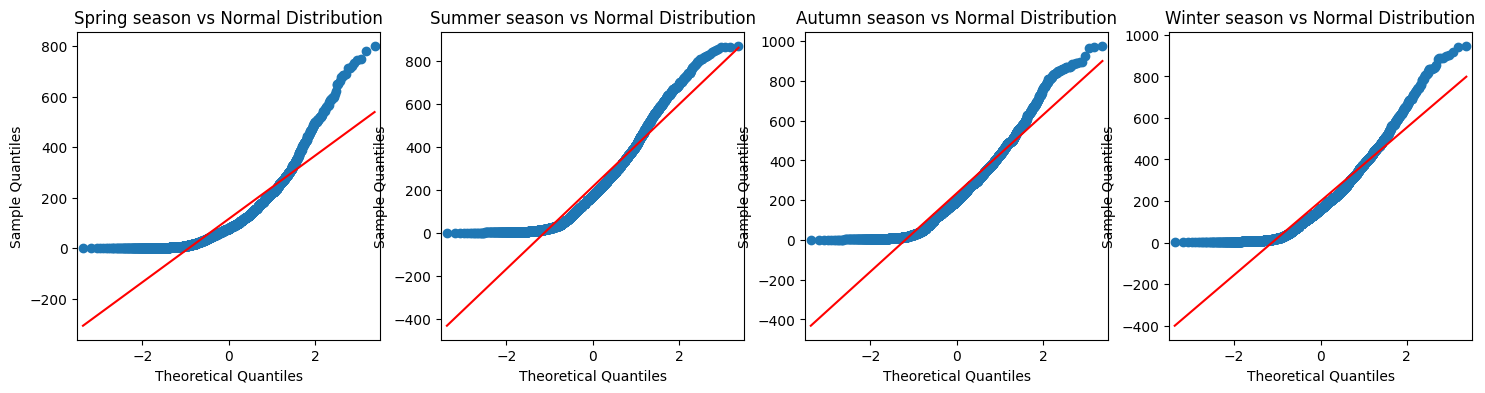

In [ ]:
# Using QQplot

fig,ax=plt.subplots(1,4,figsize=(18,4))
qqplot(Spring,line='s',ax=ax[0])
qqplot(Summer,line='s',ax=ax[1])
qqplot(Autumn,line='s',ax=ax[2])
qqplot(Winter,line='s',ax=ax[3])
ax[0].set_title('Spring season vs Normal Distribution')
ax[1].set_title('Summer season vs Normal Distribution')
ax[2].set_title('Autumn season vs Normal Distribution')
ax[3].set_title('Winter season vs Normal Distribution')

fig.show()

In [ ]:
# Null Hypo: Data is gaussian
# Alternative Hypo: Data is not gaussian

sh_stats,pvalue1=shapiro(Spring)
sh_stats,pvalue2=shapiro(Summer)
sh_stats,pvalue3=shapiro(Autumn)
sh_stats,pvalue4=shapiro(Winter)

print(f' Spring season, pvalue: {pvalue1}\n Summer season, pvalue: {pvalue2}\n Autumn season, pvalue: {pvalue3}\n Winter season, pvalue: {pvalue4}')


 Spring season, pvalue: 8.749584618867662e-49
 Summer season, pvalue: 6.039374406270491e-39
 Autumn season, pvalue: 1.043680518918597e-36
 Winter season, pvalue: 1.1299244409282836e-39


As we can see through both tests that data is not normal lets confirm through **Shapiro wilk** test too.

In [ ]:
# Null Hypo: Data is gaussian
# Alternative Hypo: Data is not gaussian

sh_stats,pvalue1=shapiro(Spring)
sh_stats,pvalue2=shapiro(Summer)
sh_stats,pvalue3=shapiro(Autumn)
sh_stats,pvalue4=shapiro(Winter)

print(f' Spring season, pvalue: {pvalue1}\n Summer season, pvalue: {pvalue2}\n Autumn season, pvalue: {pvalue3}\n Winter season, pvalue: {pvalue4}')

 Spring season, pvalue: 8.749584618867662e-49
 Summer season, pvalue: 6.039374406270491e-39
 Autumn season, pvalue: 1.043680518918597e-36
 Winter season, pvalue: 1.1299244409282836e-39


As we can see pvalue for all four seasons are less than alpha(assumed to be 0.05), we reject the null hypothesis and concludes that data is not Gaussian for all samples data.
So neither of the samples data is Gaussian but we have to check for the distribution of population and not sample as Anova assumption. So if we do the bootstraping, we will be able to conclude that data is Gaussian as per CLT. Thus, lets assume our population distribution to be Gaussian.

Lets check 2nd assumptions of ANOVA here : <br>
**Homogeneity of Variances** (Homoscedasticity) <br>
through **Levene Test** :

In [ ]:
# Null Hypo: Variances are equal
# Alt Hypo: Variance is different for atleast one group
Alpha= 0.05 #(assumed)

lvnstats,pvalue=levene(Spring,Summer,Autumn,Winter)

if pvalue<alpha:
  print('p value=',pvalue, ', Reject Null Hypothesis, atleast 1 group have statistically different variance.')
else:
  print('p value=',pvalue, ', Fail to reject Null hypothesis, all data have statisticaly same variance.')

p value= 1.0147116860043298e-118 , Reject Null Hypothesis, atleast 1 group have statistically different variance.


The Levene variance test also resulted that variance is different for samples. so that may impact the reliabity of test, which we will confirm by performing the **Kruskal Wallis Test** too later.<br>

3rd Assumption of Anova:<br>

**Independence**:<br>
 Observations within each group are independent of each other. Additionally, the groups themselves are assumed to be independent too.

### <font color='blue'>*Steps to ANOVA one way*</font> :
1. NULL HYPOTHESIS(H$_0$) :  Demand for bike rides is same in all seasons.<br>

    ALTERNATIVE HYPOTHESIS(H$_a$) : Demand for rented bike rides is different in atleast one season.<br>
2. F distribution for statistics and assumed Gaussian distribution data.<br>
3. Right tailed test is to be performed as anova is right tail always.<br>
4. Finding pvalue.<br>
5. Let's assume significance level to be 0.05 and compare with pvalue.<br>

In [ ]:
# ANOVA TEST

fstats,pvalue=f_oneway(Spring,Summer,Autumn,Winter)

alpha=0.05
if pvalue< alpha:
  conclusion ='Reject Null Hypothesis.'
else :
  conclusion = 'Fail to reject Null Hypothesis.'
if conclusion == 'Reject Null Hypothesis.':
  print(f'P value:{pvalue}\n{conclusion}\nThere is effect of season on demand for rental bikes.')
else:
  print(f'P value:{pvalue}\n{conclusion}\nThere is no effect of season on demand for rental bikes.')

P value:6.164843386499654e-149
Reject Null Hypothesis.
There is effect of season on demand for rental bikes.


As Anova shows season has significant effect on bike rentals lets confirm through another test too.<br>


In [ ]:
# KRUSKAL WALLIS TEST
# Ho: No effect of season on bike rentals
# Ha: atleast 1 season has significant effect on bike rentals

kruskal(Spring,Summer,Autumn,Winter)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

Kruskal too confimed that atleast one season has significant effect on the bike rentals
Lets check which group has different effect than other on demand for rented bikes using Ttests.

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during spring season demand is less compared to summer season

ttest_ind(Spring,Summer,alternative='less')

TtestResult(statistic=-22.41673852194779, pvalue=8.289293670200049e-107, df=5417.0)

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during spring season demand is less compared to Autumn season

ttest_ind(Spring,Autumn,alternative='less')


TtestResult(statistic=-26.262602569974415, pvalue=1.7019252177655487e-143, df=5417.0)

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during spring season demand is less compared to Winter season

ttest_ind(Spring,Winter,alternative='less')


TtestResult(statistic=-19.763761227758852, pvalue=2.6182087145333903e-84, df=5418.0)

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during Summer season demand is less compared to Autumn season

ttest_ind(Summer,Autumn,alternative='less')

TtestResult(statistic=-3.6407918229052068, pvalue=0.00013715780586249322, df=5464.0)

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during Summer season demand is less compared to Winter season

ttest_ind(Summer,Winter,alternative='less')


TtestResult(statistic=3.2507544346007022, pvalue=0.9994210159152934, df=5465.0)

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during Summer season demand is greater compared to Winter season

ttest_ind(Summer,Winter,alternative='greater')


TtestResult(statistic=3.2507544346007022, pvalue=0.0005789840847065855, df=5465.0)

In [ ]:
# H0 : both groups have same effect on demands
# Ha : during Summer season demand is greater compared to Winter season

ttest_ind(Autumn,Winter,alternative='greater')

TtestResult(statistic=6.980360925184712, pvalue=1.6471798336237476e-12, df=5465.0)

### <font color='blue'>*Conclusion*</font>

- First 3 ttests concluded to reject null hypothesis and proved that in Spring season the bike renting is least.
- Next 3 ttests indicates Summer has less rentings than Autumn but more than Winter.
- Last ttest concluded that Autumn season has higher rentings from Winter season too.
- From all above ttests we concluded that due to less pvalue than alpha which is assumed to be 0.05, we can say that we have more bike rentals during Autumn season followed by Summer, Winter and Spring season.


### <font color='blue'>*Finding out if weather conditions are significantly different during different seasons?*</font>

> As both the variables are categorial, here performing **CHISQUARE TEST** to check the assosciation of season and weather.

In [ ]:
# Creating contingency table to perform test

data=pd.crosstab(yulu_df['weather'],yulu_df['season'],margins=True)
data

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


As chisquare is a non parametric test, the assumptions are very few and all are getting satisfied here too.<br>
Assumptions of CHISQUARE TEST:
- Both variables are categorical.
- All observations are independent.
- Cells in the contingency table are mutually exclusive.
- Expected value of cells should be 5 or greater in at least 80% of cells.
- Lets take the significance value to be 0.05.

In [ ]:
# Performing chisquare test

# H0 : Weather and Season are not assosciated with each other
# Ha : Weather and Season are strongly assosciated with each other

alpha=0.05

chi2,pvalue,_,_=chi2_contingency(data)

if pvalue< alpha:
  conclusion ='Reject Null Hypothesis'
else :
  conclusion = 'Fail to reject Null Hypothesis'
if conclusion == 'Reject Null Hypothesis':
  print(f'P value: {pvalue}\n{conclusion}\nThere is strong association between weather and season.')
else:
  print(f'P value:{pvalue}\n{conclusion}\nThere is no significant association between weather and season.')

P value: 3.1185273325126814e-05
Reject Null Hypothesis
There is strong association between weather and season.


As we can see there is a category of season during which a single data point is given. Lets check if it has some effect on reliabilty of chisquare

In [ ]:
# H0 : Weather and Season are not assosciated with each other
# Ha : Weather and Season are strongly assosciated with each other

alpha=0.05

chistat,pvalue,_,_=chi2_contingency(data[:3])
if pvalue< alpha:
  conclusion ='Reject Null Hypothesis'
else :
  conclusion = 'Fail to reject Null Hypothesis'
if conclusion == 'Reject Null Hypothesis':
  print(f'P value: {pvalue}\n{conclusion}\nThere is strong association between weather and season.')
else:
  print(f'P value:{pvalue}\n{conclusion}\nThere is no significant association between weather and season.')

P value: 2.27372487311126e-07
Reject Null Hypothesis
There is strong association between weather and season.


### <font color='blue'>*Conclusion*</font>

- The pvalue for chi-square test with extreme weather is extremely low and same when data of extreme weather is excluded,
though the pvalue decreased much more when extreme weather is excluded.
- We can conclude that both weather and season are dependent on each other as we already know that when the weather is clear and season is Autumn or Summer, the bikes are rented the most.
- As the variables are not independent we cant perform two way anova to test their collective effect on bike renting which would be a great analysis if found.


### <font color='blue'>*Summary*</font>

Though all the analyses have been done above let's summarize them :
- Its observed that whenever there is Clear, Few clouds, partly cloudy the bike rental is more in comparison to other weather conditions.
66 % of rentals happened when weather is Clear, Few clouds, partly cloudy.
- Whenever there is heavy rain, thunderstorm, snow or fog, there were very few, negligible bikes were rented.
- Registered users of rental bikes contribute far more in comparison to the casual users, almost 5 times.
- Working days have not much effect on casual users but on registered users who rented almost 3 times more bikes during working days.
- Negligible demand during midnight hours.
- Casual users rented more during Fall and summer which reduced during Winter and the least during Spring season.
- Registered users rented almost same during Fall, Summer and Winter but least during Spring season.
- Renting decrease when temperature starts dipping below 7°-8° C or when humidity start increasing too much or below 20.
- Based on hypothesis testing, working and non working day doesnot have effect on bike rentings.
- Based on hypothesis testing ,weather and season do have effects on the bike rentals.
- Season and weather are strongly associated with each other.

### <font color='blue'>*Recommendations*</font>

- Having more users registered is favourable to the company as they tend to rent more so should try to acquire more and more registered users by providing offers, discounts and low cost registrations.
- There are as much as 997 bikes renting in a hour so we should be ready with atleast 4x times the bikes at places to ensure demand in case of positive business and to ensure their charging and cleaning etc.
- To ensure the availbality of staff during peak hours and peak periods.
- There are 262 days when not a single booking is made on that day which is an area of concern need to check the reason behind that .
- Need to check external data of weather, non working days etc to confirm if the days when no ride is booked belongs to that period, so due to limitations of data here, cant reach to the cause here.
- We can put over bikes on charge during 00:00 to 5:00 hours if battery lasts for 20+ hours as these are less renting  hours.
- But if it is required to be charged within 12 hrs or sooner then we must ensure 3-4x bikes in our stores.
- The renting becomes high with high temperature but not much humidity and clear weather conditions.So it is best for the business to try to acquire more users that time.
- During Summer,Winter and Fall/Autumn seasons, the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to Spring season.
- The renting is least during spring season which needs to be study to know the reason anf if it is related to bikes working , have to improve these workings.
- In very low humid days,less temperature,or extreme weather conditions,company can have less bikes too, so it should complete its all maintenance tasks, repairing etc during these periods.
- Since the registered users are highest contributors, this show positive sign of the service provided by the company and must continue maintaining the levels during the highest demand spike seasons too.
 So, there feedbacks should be taken time to time to retain the existing customers.

